In [1]:
from env import simGym
from ppo_network import PolicyNetwork
import numpy as np
from data import Trajectory, Buffer

In [2]:
n_actions = 1
n_states = 3
n_steps = 200  # steps for per episode
n_episode = 50
n_steps_per_learn = n_episode * n_steps
pn = PolicyNetwork(n_states, 
                 n_actions, 
                 n_steps, 
                 n_steps_per_learn)
t = Trajectory()
buffer = Buffer(n_states, n_actions, n_episode, n_steps)

In [3]:
sim = simGym()
observation, info = sim.reset()
training_times = 1000
reward_list = []
for times in range(training_times):
    buffer.reset()
    for i in range(n_episode):
        t.reset()
        for _ in range(n_steps):
            actions = pn.infer(state=observation, noise=True)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()
            t.add(observation, actions, reward)
        observation, info = sim.reset()
        buffer.add(t)
    print(times, np.mean(buffer.rewards))
    reward_list.append(np.mean(buffer.rewards))
    pn.learn(buffer)


0 -6.086071583653512
1 -5.7548539270596795
2 -6.302621800728542
3 -5.963401039815365
4 -6.163710661928655
5 -5.756520218605579
6 -5.718148469504886
7 -5.65135736106449
8 -5.969376842732987
9 -6.106916242760068
10 -5.9962331282708385
11 -6.121748562535457
12 -6.206329616041647
13 -6.2756397035942815
14 -5.683318905593567
15 -6.169337445541225
16 -6.122031645196715
17 -6.453790935612812
18 -6.263335306055394
19 -5.927970735858169
20 -5.998533720488961
21 -6.0695504228617265
22 -6.052491470872883
23 -6.0405595802774315
24 -6.282164957390464
25 -6.481410016026471
26 -6.46523157865893
27 -6.277356369285572
28 -6.218056616274832
29 -6.619477935032877
30 -6.433082845545274
31 -6.412422422624781
32 -6.4340778632822175
33 -6.5938135067424755
34 -6.58646944277414
35 -6.435489059880809
36 -6.6477368253200035
37 -6.48643004627228
38 -6.42789826154538
39 -6.1396307183670595
40 -6.201120038704489
41 -6.503553526489766
42 -5.979579962185609
43 -6.276221841486446
44 -6.581324481077462
45 -6.3917368719

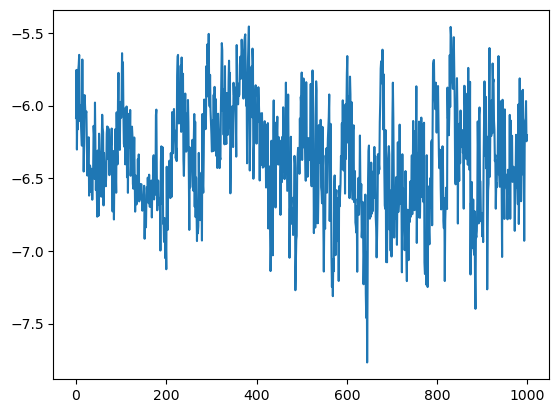

In [4]:
import matplotlib.pyplot as plt
plt.plot(reward_list)

In [5]:
sim = simGym(render_mode=True)
observation, info = sim.reset()
for _ in range(200):
            actions = pn.infer(state=observation, noise=True)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()